# Proceso de Tokenizacion

## Descripción General
Este notebook explora el uso del tokenizador y el modelo preentrenado BERT (bert-base-uncased) para realizar tareas de tokenización, comparación de similitud semántica entre palabras y visualización de relaciones mediante mapas de calor.

## Librerías Utilizadas
- transformers: Para cargar el tokenizador y el modelo BERT.

- torch: Para operaciones con tensores.

- seaborn y matplotlib: Para visualización de datos.

- pandas y numpy: Para manipulación de datos y estructuras.

In [1]:
!pip install transformers torch seaborn matplotlib pandas numpy

  Using cached transformers-4.56.1-py3-none-any.whl.metadata (42 kB)
  Using cached torch-2.8.0-cp313-cp313-win_amd64.whl.metadata (30 kB)
  Using cached pandas-2.3.2-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached huggingface_hub-0.34.4-py3-none-any.whl.metadata (14 kB)
  Using cached regex-2025.9.1-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached tokenizers-0.22.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Importación de Librerías

In [2]:
from transformers import BertTokenizer
import torch
from transformers import BertModel
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

D:\profile\programing\ia\BasicLLMsModels\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Carga del Tokenizador y Modelo BERT
- Se carga el tokenizador bert-base-uncased.

- Se tokeniza la frase: "Hola cómo estás?".

In [3]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize("Hola cómo estás?")

In [4]:
tokens

['ho', '##la', 'como', 'est', '##as', '?']

In [5]:
model = BertModel.from_pretrained("bert-base-uncased")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


## 3. Definición de la Clase Token
La clase Token permite:

- Convertir una palabra en un token y obtener su embedding.

- Calcular la similitud coseno entre dos tokens.

- Mostrar similitudes en porcentaje o valor numérico.

In [15]:
class Token:
  def __init__(self, label: str):
    self.label: str = label
    self.id: int = tokenizer.convert_tokens_to_ids([self.label])[0]
    self.embedding = model.embeddings.word_embeddings(torch.tensor([self.id]))

  def get_similarity_per(self, tensor: torch.Tensor, toLabel: str) -> str:
    value = tensor.item()
    return f"The {self.label} and {toLabel} have a {round(value * 100, 2)}% similarity";


  def compare(self, to: "Token") -> str:
    similarity_tensor = torch.nn.functional.cosine_similarity(self.embedding, to.embedding, dim=1)
    return self.get_similarity_per(similarity_tensor[0], to.label)

  def compare_get(self, to: "Token") -> str:
    similarity_tensor = torch.nn.functional.cosine_similarity(self.embedding, to.embedding, dim=1)
    return round(similarity_tensor[0].item(), 2)

## 4. Creación de Tokens de Ejemplo
Se crean instancias de la clase `Token` para palabras como:

- `king`, `man`, `woman`, `queen`, `teacher`, `soldier`

- `cat`, `lion`, `tiger`, `dog`, `gray_wolf`, `coyote`

In [7]:
king = Token("king")
man = Token("man")
woman = Token("woman")
queen = Token("queen")
teacher = Token("teacher")
soldier = Token("soldier")

cat = Token("cat")
lion = Token("lion")
tiger = Token("tiger")
dog = Token("dog")
gray_wolf = Token("Gray wolf")
coyote = Token("coyote")

In [8]:
king.embedding

tensor([[ 1.0459e-02, -4.1597e-02, -2.8762e-02, -2.1271e-03, -3.6137e-02,
         -5.9453e-02, -1.8821e-02, -5.3518e-02, -4.5944e-02, -1.0334e-01,
         -2.6336e-02, -3.7564e-02,  4.7280e-05, -4.1316e-02,  1.1089e-03,
         -3.4041e-02,  3.6455e-03, -4.3182e-03,  4.5244e-02, -3.2792e-03,
         -2.9757e-02, -1.2348e-02,  2.7182e-02,  1.8084e-02, -8.3842e-03,
         -4.1677e-02,  1.1041e-02,  3.2859e-03,  2.8347e-02, -1.0402e-02,
          5.0695e-02, -5.3480e-02, -3.2858e-02, -2.4704e-02, -4.6392e-03,
         -9.3113e-03,  3.9658e-02,  1.9593e-02, -3.8411e-03, -2.7013e-02,
         -4.1830e-02, -3.2505e-02,  4.3060e-02, -3.7079e-02, -4.0751e-02,
          2.2578e-02, -4.2186e-02, -9.9416e-03,  1.2697e-02,  4.2084e-02,
          1.2595e-02, -1.4879e-02, -7.6563e-02,  4.5787e-03,  2.0950e-03,
         -4.4385e-02,  4.1950e-02,  2.3039e-02, -1.2759e-02,  7.6823e-03,
         -1.9078e-02, -2.7273e-02, -1.5740e-02, -2.0539e-03, -4.4950e-02,
          1.5379e-03, -7.2257e-02, -1.

## 5. Comparación de Similitudes
- Se comparan pares de palabras usando similitud coseno.

- Se prueba la analogía clásica: `king - man + woman ≈ queen`

In [9]:
print(queen.compare(man))
print(king.compare(queen))
similarity = torch.nn.functional.cosine_similarity(king.embedding-man.embedding+woman.embedding, queen.embedding)
print(similarity[0])

The queen and man have a 23.28% similarity
The king and queen have a 64.69% similarity
tensor(0.6469, grad_fn=<SelectBackward0>)


In [10]:
canidae_list = [dog, gray_wolf, coyote]
felidae_list = [cat, lion, tiger]
for i in range(len(canidae_list)):
  for j in range(len(felidae_list)):
    print(canidae_list[i].compare(felidae_list[j]), end="\n\n")

print(cat.compare(tiger))
print(cat.compare(lion))

The dog and cat have a 50.82% similarity

The dog and lion have a 38.41% similarity

The dog and tiger have a 36.28% similarity

The Gray wolf and cat have a 20.47% similarity

The Gray wolf and lion have a 28.21% similarity

The Gray wolf and tiger have a 29.37% similarity

The coyote and cat have a 33.22% similarity

The coyote and lion have a 41.59% similarity

The coyote and tiger have a 42.79% similarity

The cat and tiger have a 40.78% similarity
The cat and lion have a 36.62% similarity


## 6. Visualización con Heatmaps
- Se generan dos mapas de calor:

### 1. Animales vs Humanos: Muestra similitudes entre tokens de animales y humanos.

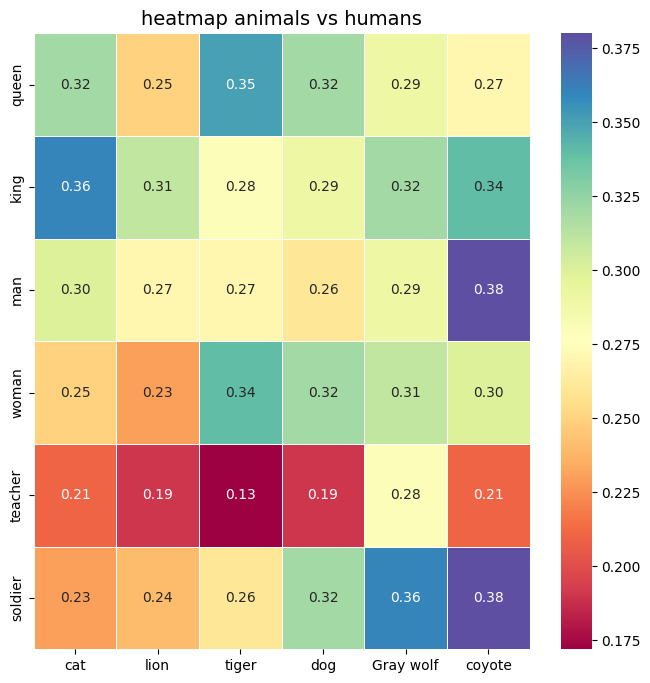

In [11]:
animal_tokens  = [cat, lion, tiger, dog, gray_wolf, coyote]
human_tokens = [queen, king, man, woman, teacher, soldier]

data = []
for a in animal_tokens:
    row = []
    for h in human_tokens:
        sim = a.compare_get(h)
        row.append(sim)
    data.append(row)
df = pd.DataFrame(data,
                  columns=[animal.label for animal in animal_tokens],
                  index=[human.label for human in human_tokens])

plt.figure(figsize=(8,8))
sns.heatmap(df,
            annot=True,        # Mostrar valores
            fmt=".2f",         # Formato de los números
            cmap="Spectral",     # Paleta de colores
            linewidths=0.5,
            robust=True)    # Líneas divisorias

# 4️⃣ Mostrar
plt.title("heatmap animals vs humans", fontsize=14)
plt.show()


### 2. Humanos vs Humanos: Muestra similitudes entre tokens de humanos.

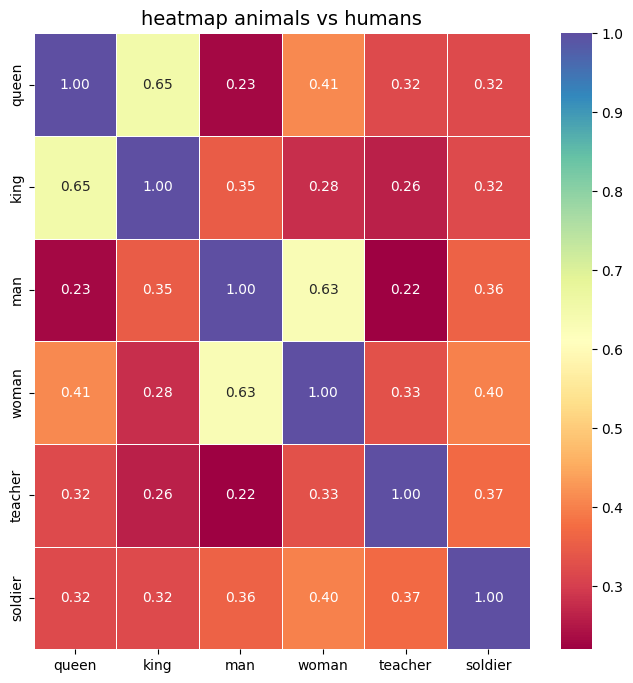

In [12]:
data = []
for a in human_tokens:
    row = []
    for h in human_tokens:
        sim = a.compare_get(h)
        row.append(sim)
    data.append(row)
df = pd.DataFrame(data,
                  columns=[human.label for human in human_tokens],
                  index=[human.label for human in human_tokens])

plt.figure(figsize=(8,8))
sns.heatmap(df,
            annot=True,        # Mostrar valores
            fmt=".2f",         # Formato de los números
            cmap="Spectral",     # Paleta de colores
            linewidths=0.5,
            robust=True)    # Líneas divisorias

# 4️⃣ Mostrar
plt.title("heatmap animals vs humans", fontsize=14)
plt.show()


### 2. Animales vs Animales: Muestra similitudes entre tokens de animales.

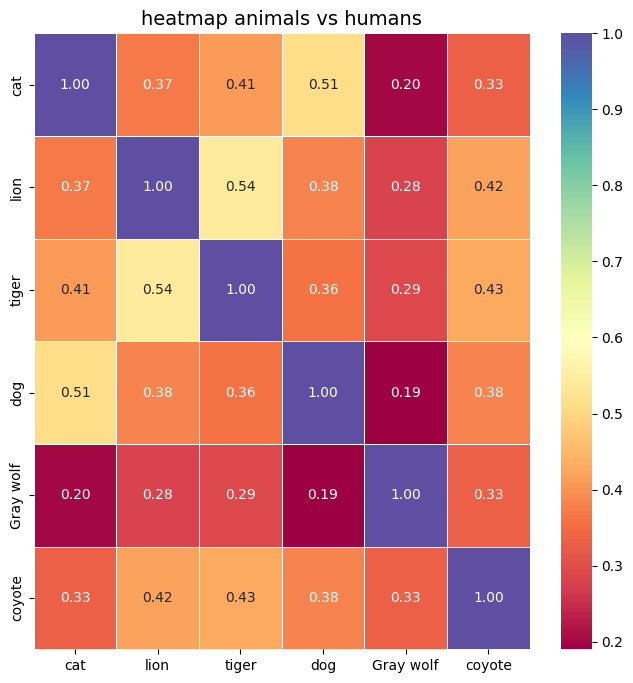

In [13]:
data = []
for a in animal_tokens:
    row = []
    for h in animal_tokens:
        sim = a.compare_get(h)
        row.append(sim)
    data.append(row)
df = pd.DataFrame(data,
                  columns=[animal.label for animal in animal_tokens],
                  index=[animal.label for animal in animal_tokens])

plt.figure(figsize=(8,8))
sns.heatmap(df,
            annot=True,        # Mostrar valores
            fmt=".2f",         # Formato de los números
            cmap="Spectral",     # Paleta de colores
            linewidths=0.5,
            robust=True)    # Líneas divisorias

# 4️⃣ Mostrar
plt.title("heatmap animals vs humans", fontsize=14)
plt.show()
